In [5]:
import pandas as pd

In [ ]:
# kto_total 엑셀 파일 읽어들인 후 조회하기
# df 변수 이름으로 가져오기

In [6]:
df = pd.read_excel('./files/kto_total.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6960 entries, 0 to 6959
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   국적        6960 non-null   object 
 1   관광        6960 non-null   int64  
 2   상용        6960 non-null   int64  
 3   공용        6960 non-null   int64  
 4   유학/연수     6960 non-null   int64  
 5   기타        6960 non-null   int64  
 6   계         6960 non-null   int64  
 7   기준년월      6960 non-null   object 
 8   대륙        6960 non-null   object 
 9   관광객비율(%)  6960 non-null   float64
 10  전체비율(%)   6960 non-null   float64
dtypes: float64(2), int64(6), object(3)
memory usage: 598.2+ KB


In [119]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform

if platform.system() =='window':
    path = 'c:/Window/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else:
    print('Cheak your OS System...')

Cheak your OS System...


In [8]:
# 중국 데이터만 조회하기
df_filter = df[df['국적'] == '중국']
df_filter

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0
...,...,...,...,...,...,...,...,...,...,...,...
6677,중국,410542,3575,362,9959,68812,493250,2019-04,아시아,83.2,29.7
6737,중국,413949,4034,534,14003,67893,500413,2019-05,아시아,82.7,33.6
6797,중국,395196,3743,399,14680,60989,475007,2019-06,아시아,83.2,31.9
6857,중국,439699,3587,356,10847,64643,519132,2019-07,아시아,84.7,36.1


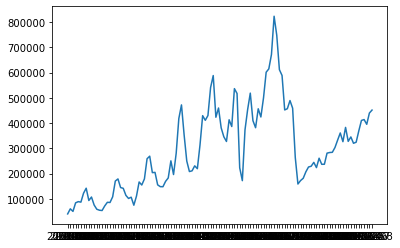

In [9]:
# 기준년월별 관광객 변화 추이
plt.plot(df_filter['기준년월'], df_filter['관광'])
plt.show()

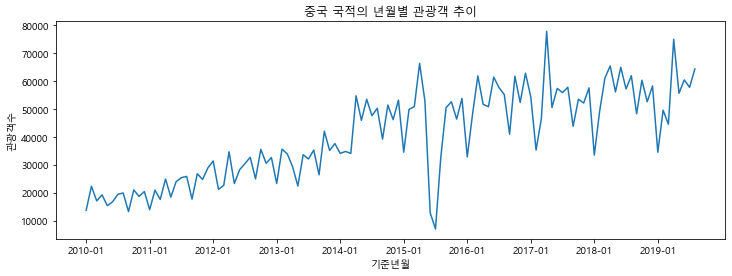

In [120]:
# 그래프 크기 조정
plt.figure(figsize = (12,4))
# 데이터 넣기
plt.plot(df_filter['기준년월'], df_filter['관광'])

#그래프 전체 제목 넣기
plt.title('중국 국적의 년월별 관광객 추이')

# x축, y툭 이름 달기
plt.xlabel('기준년월')
plt.ylabel('관광객수')

# x축의 눈금 값 설정하기
plt.xticks(['2010-01','2011-01','2012-01','2013-01','2014-01','2015-01','2016-01','2017-01','2018-01','2019-01'])


plt.show()

In [32]:
# 우리나라에 방문하는 외국인의 비율이 높은 상위 5개 국가를 조회..
# 상위 top5 국가 조회..
df.sort_values(by='전체비율(%)', ascending= False).head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
4697,중국,823016,4103,354,7122,82924,917519,2016-07,아시아,89.7,58.6
4757,중국,747818,4352,270,35523,85808,873771,2016-08,아시아,85.6,57.0
120,일본,299820,1483,124,519,4180,306126,2010-03,아시아,97.9,55.0
3317,중국,588181,8340,173,23091,137898,757683,2014-08,아시아,77.6,54.3
4337,중국,456636,3723,140,4383,57099,521981,2016-01,아시아,87.5,52.8


In [59]:
# 피벗테이블 이용하여 상위 top5 조회
# 국적별 전체비율에 대한 평균을 내림차순하여 상위 5개 추출

temp = pd.pivot_table(df, values='전체비율(%)', index='국적',aggfunc='mean').sort_values('전체비율(%)', ascending=False).head()

temp

,전체비율(%)
국적,
중국,32.116379
일본,28.350000
대만,6.650000
미국,6.039655
홍콩,4.645690


In [60]:
# 데이터프레임 형태로 변환하기
temp.reset_index(inplace = True)

In [80]:
contry_list = temp['국적']

In [ ]:
# contry_list 상위 5개 국적을 이용해서
# 기준년월별 관광객이 추이 그래프 그리기
# 반복문 사용해서 그리기
# 그래프 제목문은 각 국가이름으로

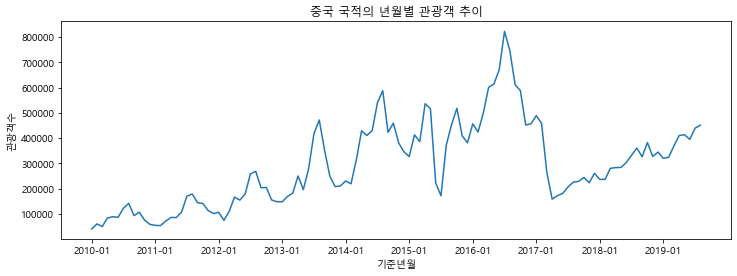

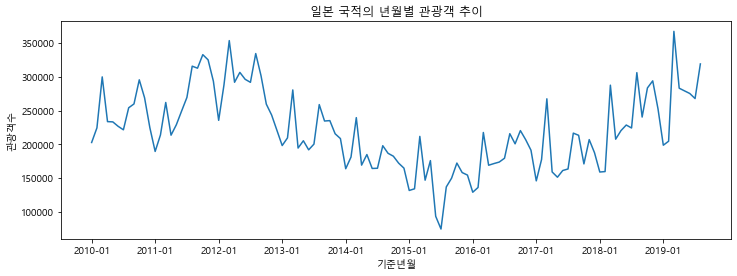

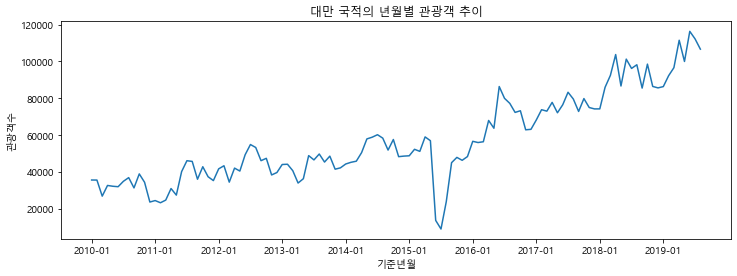

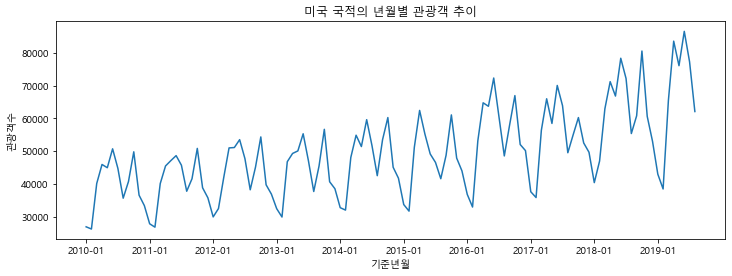

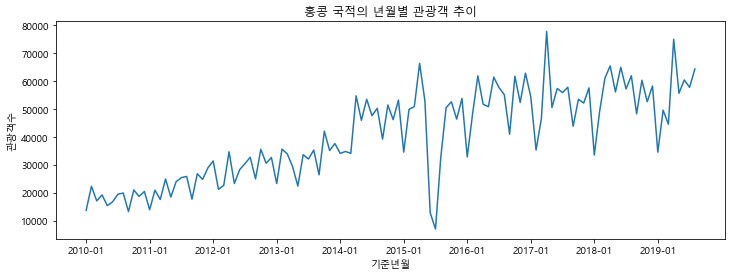

In [121]:
from matplotlib import font_manager, rc

for contry in contry_list: 
    df_filter = df[df['국적'] == '{}'.format(contry)]
    
    # 그래프 크기 조정
    plt.figure(figsize = (12,4))
    # 데이터 넣기
    plt.plot(df_filter['기준년월'], df_filter['관광'])

    #그래프 전체 제목 넣기
    plt.title(f'{contry} 국적의 년월별 관광객 추이')

    # x축, y툭 이름 달기
    plt.xlabel('기준년월')
    plt.ylabel('관광객수')

    # x축의 눈금 값 설정하기
    plt.xticks(['2010-01','2011-01','2012-01','2013-01','2014-01','2015-01','2016-01','2017-01','2018-01','2019-01'])


    plt.show()

In [89]:
# 히트맵 그리기
df2 =df
df

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3
...,...,...,...,...,...,...,...,...,...,...,...
6955,대양주 기타,519,1,6,9,74,609,2019-08,오세아니아,85.2,0.0
6956,남아프리카공화국,634,6,1,11,1235,1887,2019-08,아프리카,33.6,0.1
6957,아프리카 기타,2081,593,165,841,1184,4864,2019-08,아프리카,42.8,0.2
6958,국적미상,36,1,0,8,12,57,2019-08,기타대륙,63.2,0.0


In [90]:
df2= df.copy()
df2

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3
...,...,...,...,...,...,...,...,...,...,...,...
6955,대양주 기타,519,1,6,9,74,609,2019-08,오세아니아,85.2,0.0
6956,남아프리카공화국,634,6,1,11,1235,1887,2019-08,아프리카,33.6,0.1
6957,아프리카 기타,2081,593,165,841,1184,4864,2019-08,아프리카,42.8,0.2
6958,국적미상,36,1,0,8,12,57,2019-08,기타대륙,63.2,0.0


In [100]:
# df2의 기준년월 데이터에서 년도만 추출하여 '년도' 컬럼 만들기
# df2의 기준년월 데이터에서 월만 추출하여 '월' 컬럼 만들기
df['년도'] = df['기준년월'].str[:4]  # df2['기준년월'].str.slice(0,4)
df['월'] = df['기준년월'].str[5:7]

df

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6,2010,01
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9,2010,01
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5,2010,01
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1,2010,01
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3,2010,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6955,대양주 기타,519,1,6,9,74,609,2019-08,오세아니아,85.2,0.0,2019,08
6956,남아프리카공화국,634,6,1,11,1235,1887,2019-08,아프리카,33.6,0.1,2019,08
6957,아프리카 기타,2081,593,165,841,1184,4864,2019-08,아프리카,42.8,0.2,2019,08
6958,국적미상,36,1,0,8,12,57,2019-08,기타대륙,63.2,0.0,2019,08


In [101]:
df_filter = df[df['국적'] == '중국']
df_filter

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1,2010,01
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6,2010,02
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2,2010,03
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5,2010,04
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0,2010,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6677,중국,410542,3575,362,9959,68812,493250,2019-04,아시아,83.2,29.7,2019,04
6737,중국,413949,4034,534,14003,67893,500413,2019-05,아시아,82.7,33.6,2019,05
6797,중국,395196,3743,399,14680,60989,475007,2019-06,아시아,83.2,31.9,2019,06
6857,중국,439699,3587,356,10847,64643,519132,2019-07,아시아,84.7,36.1,2019,07


In [ ]:
pd.pivot_table(df, values='전체비율(%)', index='국적',aggfunc='mean').sort_values('전체비율(%)', ascending=False).head()

In [108]:
# 년도 및 월별 관광 데이터의 조회
# 행은 년도, 열은 월
pd.pivot_table(df, values='관광', index='월')
df_pivot = df_filter.pivot_table(values='관광',
                                 index='년도',
                                 columns='월')

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

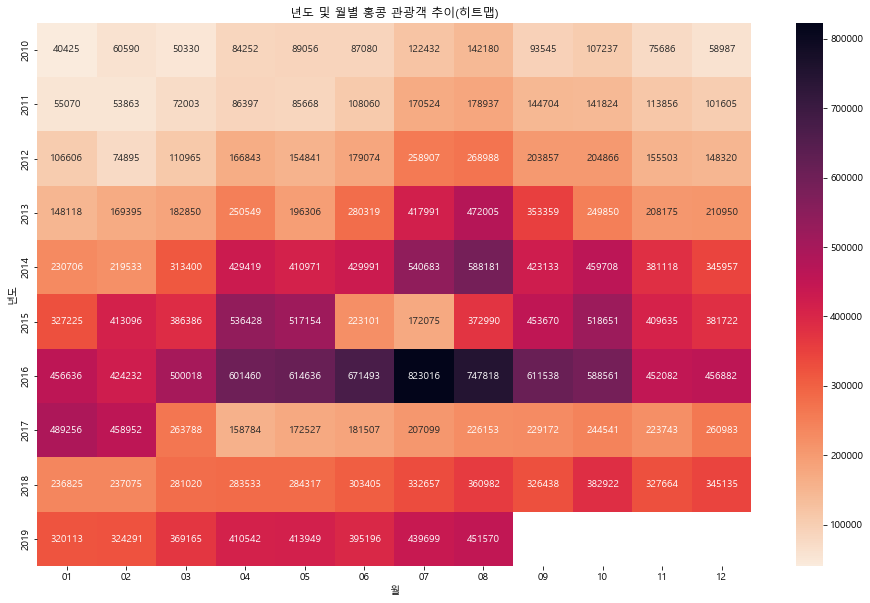

In [123]:
# 그래프 사이즈 설정하기
plt.figure(figsize=(16, 10))

# 히트맵 그리기
sns.heatmap(df_pivot, annot=True, fmt='.0f', cmap='rocket_r')
#그래프 전체 제목 넣기
plt.title(f'년도 및 월별 {contry} 관광객 추이(히트맵)')
plt.show()

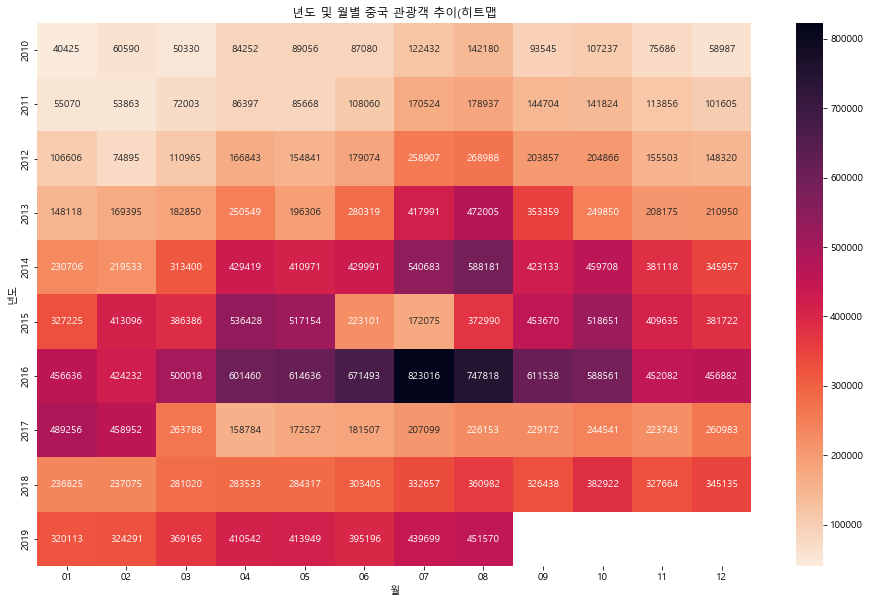

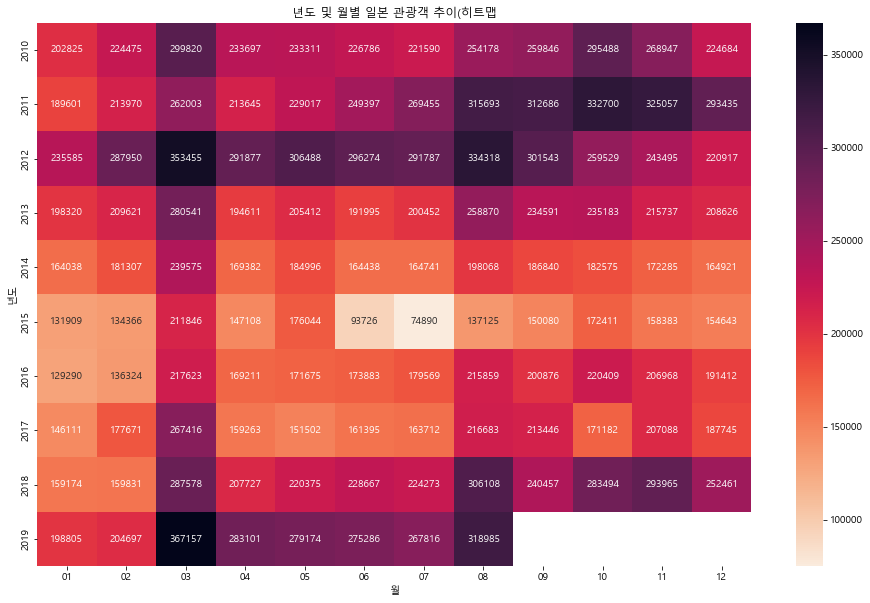

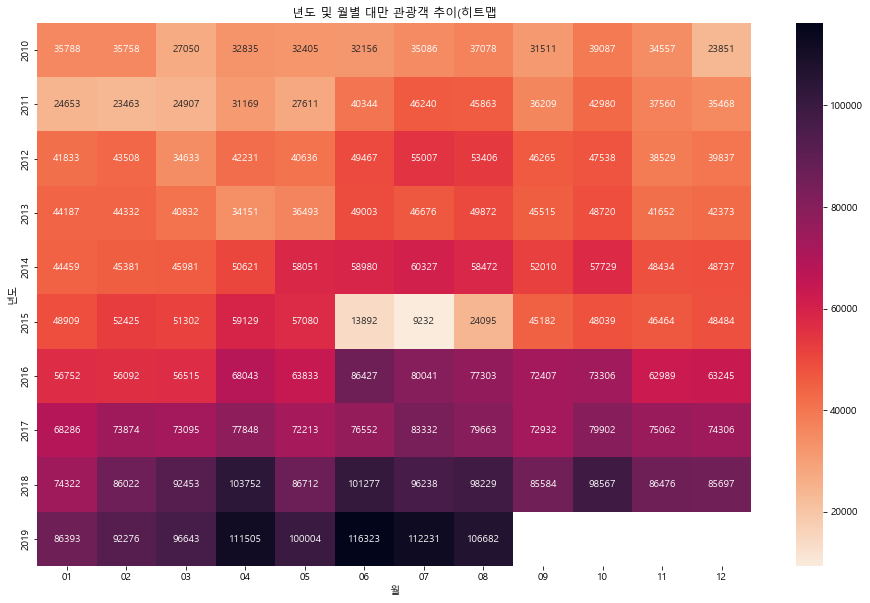

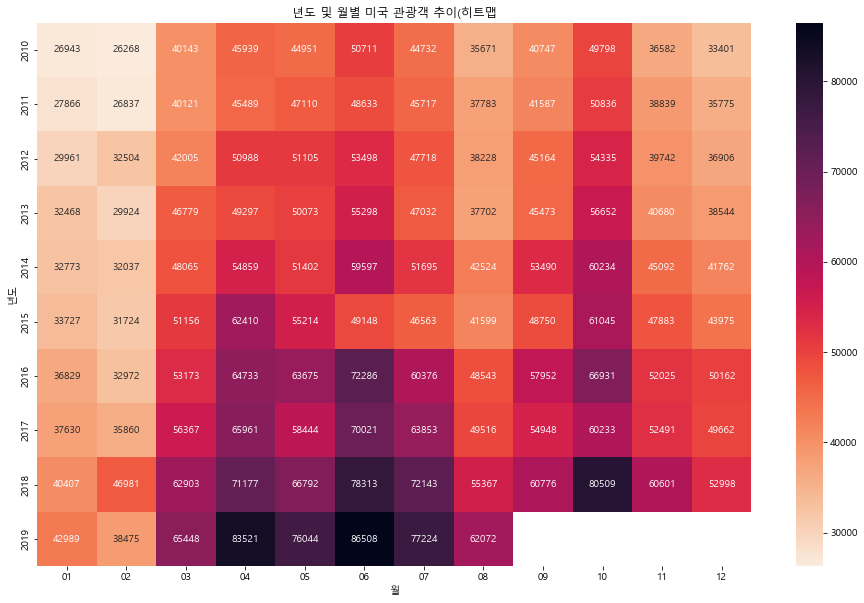

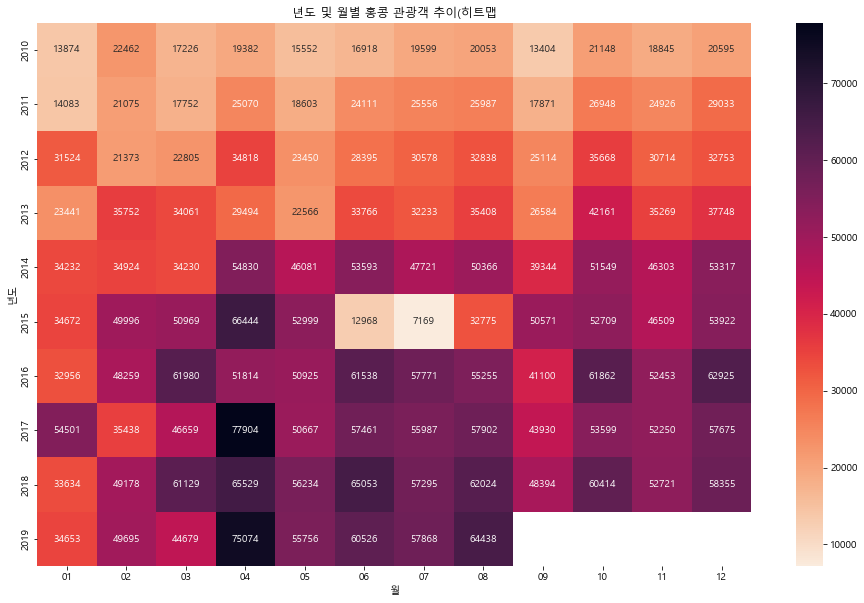

In [127]:
contry_list = temp['국적']
for contry in contry_list: 
    df_filter = df[df['국적'] == contry]
    df_pivot = df_filter.pivot_table(values='관광',
                                 index='년도',
                                 columns='월')
    plt.figure(figsize=(16, 10))

    sns.heatmap(df_pivot, annot=True, fmt='.0f', cmap='rocket_r')

    plt.title(f'년도 및 월별 {contry} 관광객 추이(히트맵')  # (년도 및 월별 {} 관광객 추이(히트맵').format(contry)
    plt.show()

In [128]:
# (트렌드) 2010년부터 2018년까지 관광객수가 꾸준히 증가하고 있으며, 계절적인 영향을 많이 받는 것으로 보임.
# (이벤트) 2015년 6~8월 중에 관광객수가 급격히 감소 했음.
#               - 원인분석 : 메르스 전염병에 의한 일시적 감소를 보였으며, 이후 증가함.
#               중국의 경우 2017년 3월부터 관광객수가 급격히 감수 했음.
#               - 원인 분석 :  우리나라 정부의 사드 미사일 기지 설치에 따른 보복으로 
#                              급격히 감소하였으며, 매우 미미하게 관광객이 증가하고 있음.
# (계절) 2010년부터 4월~8월 사이에 국내 관광객이 많으며,
#        2016년 이후 봄, 여름에 매우 많은 관광객과, 가을에 매우 많은 관광객이 찾고 있음.
